In [1]:
!pip install seaborn
!pip install pandas
!pip install numpy

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
tt = sns.load_dataset('titanic')

In [5]:
print('type:', type(tt))
print('shape:', tt.shape)
print('describe : \n', tt.describe()) # 각 열의 통계정보를 표시
print('info : \n', tt.info()) # 데이터 프레임의 정보를 표시
print('head : \n',tt.head())

type: <class 'pandas.core.frame.DataFrame'>
shape: (891, 15)
describe : 
          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null   

### Pclass별 생존자의 수, 비율 측정

In [20]:
tt['pclass'].count()

891

In [15]:
pclass = tt.groupby('pclass')
print(pclass.count())

        survived  sex  age  sibsp  parch  fare  embarked  class  who  \
pclass                                                                 
1            216  216  186    216    216   216       214    216  216   
2            184  184  173    184    184   184       184    184  184   
3            491  491  355    491    491   491       491    491  491   

        adult_male  deck  embark_town  alive  alone  
pclass                                               
1              216   175          214    216    216  
2              184    16          184    184    184  
3              491    12          491    491    491  


In [23]:
tt_survived_pclass = tt[['survived', 'pclass']]
tt_survived_pclass.head()

,survived,pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [25]:
survival_cnt = tt.groupby('pclass')['survived']
print("각 등급별 사람의 수")
print(survival_cnt.count())
print("각 등급별 생존자의 수")
print(survival_cnt.sum())
print(survival_cnt.value_counts())

각 등급별 사람의 수
pclass
1    216
2    184
3    491
Name: survived, dtype: int64


In [28]:
print("각 등급별 생존자의 수")
print(survival_cnt.sum())
print(survival_cnt.value_counts())

각 등급별 생존자의 수
pclass
1    136
2     87
3    119
Name: survived, dtype: int64
pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


In [27]:
print("각 등급 안에서의 생존자의 비율")
print(survival_cnt.mean())

각 등급 안에서의 생존자의 비율
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [31]:
print("전체에서의 각 등급별 생존자 비율")
print(survival_cnt.sum()/len(survival_cnt))


pclass
1    45.333333
2    29.000000
3    39.666667
Name: survived, dtype: float64


<ipython-input-34-800553060a2c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=survival_counts, palette='viridis')


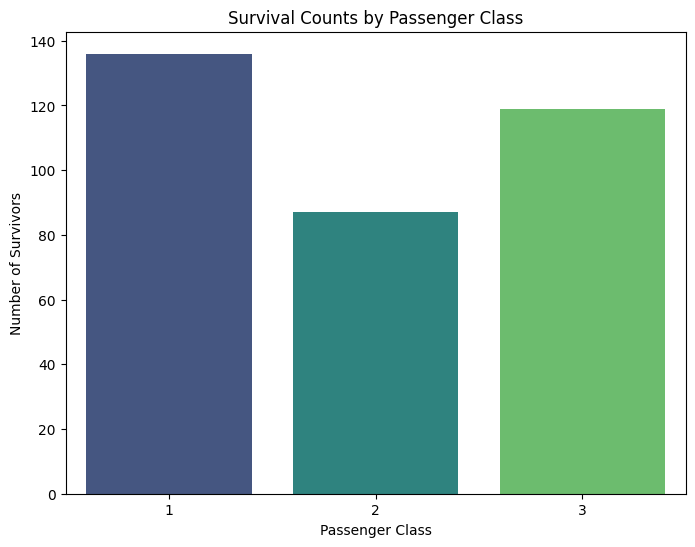

In [34]:
import matplotlib.pyplot as plt
# 각 등급별 생존자 수 계산
survival_counts = tt.groupby('pclass')['survived'].sum().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=survival_counts, palette='viridis')
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.show()

### 결과

1등급 > 3등급 > 2등급 순으로 생존자가 많음

다만, 각 등급 안에서의 생존자의 비율은 1등급 > 2등급 > 3등급 순위이다.